In [1]:
from lotteries.graph_theory_lotteries import Lottery
import hypernetx as hnx

 No module named 'celluloid'. If you need to use hypernetx.algorithms.contagion, please install additional packages by running the following command: pip install .['all']
 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


In [3]:
mylot = Lottery(claimant_groups={'hello': (2,3,4), 'goodbye': (2,3,4,5)},remove_subgroups=False)
mylot.graph.setsystem

{'hello': (2, 3, 4), 'goodbye': (2, 3, 4, 5)}

In [39]:
mylot.graph.__dict__

{'name': None,
 'misc_cell_properties_col': None,
 'misc_properties_col': 'properties',
 'default_edge_weight': 1.0,
 'default_node_weight': 1.0,
 '_edge_col': 'edges',
 '_node_col': 'nodes',
 '_cell_weight_col': 'cell_weights',
 'E': <hypernetx.classes.entityset.EntitySet at 0x7f22dd131f00>,
 '_edges': <hypernetx.classes.entityset.EntitySet at 0x7f22dd131f00>,
 '_nodes': <hypernetx.classes.entityset.EntitySet at 0x7f22dd163a90>,
 '_dataframe':      edges nodes  cell_weights
 0    hello     2           1.0
 1    hello     3           1.0
 2    hello     4           1.0
 3  goodbye     2           1.0
 4  goodbye     3           1.0
 5  goodbye     4           1.0
 6  goodbye     5           1.0,
 '_data_cols': ['edges', 'nodes'],
 'self': None, hypernetx.classes.hypergraph.Hypergraph,
 'setsystem': {'hello': (2, 3, 4), 'goodbye': (2, 3, 4, 5)},
 'cell_weights': 1.0,
 'cell_properties': None,
 'aggregateby': 'first',
 'edge_properties': None,
 'node_properties': None,
 'properties': Non

In [4]:
newgraph = mylot.graph.toplexes()
newgraph.setsystem

,edges,nodes,cell_weights
3,goodbye,2,1.0
4,goodbye,3,1.0
5,goodbye,4,1.0
6,goodbye,5,1.0


In [5]:
mylot.graph.__dict__

{'name': None,
 'misc_cell_properties_col': None,
 'misc_properties_col': 'properties',
 'default_edge_weight': 1.0,
 'default_node_weight': 1.0,
 '_edge_col': 'edges',
 '_node_col': 'nodes',
 '_cell_weight_col': 'cell_weights',
 'E': <hypernetx.classes.entityset.EntitySet at 0x7f22dd131f00>,
 '_edges': <hypernetx.classes.entityset.EntitySet at 0x7f22dd131f00>,
 '_nodes': <hypernetx.classes.entityset.EntitySet at 0x7f22dd163a90>,
 '_dataframe':      edges nodes  cell_weights
 0    hello     2           1.0
 1    hello     3           1.0
 2    hello     4           1.0
 3  goodbye     2           1.0
 4  goodbye     3           1.0
 5  goodbye     4           1.0
 6  goodbye     5           1.0,
 '_data_cols': ['edges', 'nodes'],
 'self': None, hypernetx.classes.hypergraph.Hypergraph,
 'setsystem': {'hello': (2, 3, 4), 'goodbye': (2, 3, 4, 5)},
 'cell_weights': 1.0,
 'cell_properties': None,
 'aggregateby': 'first',
 'edge_properties': None,
 'node_properties': None,
 'properties': Non

In [6]:
mylot2 = Lottery(claimant_groups={'hello': (2,3,4), 'goodbye': (1,2), 'goodmorning': (1,2,3)})

In [13]:
mylot2.graph.setsystem

{'hello': (2, 3, 4), 'goodbye': (1, 2), 'goodmorning': (1, 2, 3)}

In [14]:
import pandas as pd

In [16]:
mysetsystem = mylot2.graph.setsystem

In [22]:
mysetsystem2 = {
    'hello': ([2,0.5], [3,0.5], [4,0.8]),
    'goodbye': ([1,1], [2,0.3]),
    'goodmorning': ([1,0.4], [2,0.2], [3,0.8])}

In [17]:
list(mysetsystem.items())

[('hello', (2, 3, 4)), ('goodbye', (1, 2)), ('goodmorning', (1, 2, 3))]

In [33]:
my_df = pd.DataFrame(mysetsystem2.items(), columns = ['edges','nodes']).explode('nodes',ignore_index=True)
my_df[['nodes','cell_weights']] = pd.DataFrame(my_df['nodes'].tolist(), index= my_df.index)
my_df

,edges,nodes,cell_weights
0,hello,2,0.5
1,hello,3,0.5
2,hello,4,0.8
3,goodbye,1,1.0
4,goodbye,2,0.3
5,goodmorning,1,0.4
6,goodmorning,2,0.2
7,goodmorning,3,0.8


In [34]:
anothergraph = hnx.Hypergraph(my_df)

In [66]:
edges_and_nodes = list(anothergraph.edges()) + list(anothergraph.nodes())
translator_dict = {elem: idx for idx, elem in enumerate(edges_and_nodes)}
inv_translator_dict = {value: key for key, value in translator_dict.items}

{'goodbye': 0, 'goodmorning': 1, 'hello': 2, 1: 3, 2: 4, 3: 5, 4: 6}

In [81]:
anothergraph.incidence_dict

{'goodbye': [1, 2], 'goodmorning': [1, 2, 3], 'hello': [2, 3, 4]}

In [43]:
bip_another_graph = anothergraph.bipartite()

In [57]:
bip_another_graph.adjacency()

In [63]:
list(anothergraph.nodes())

[1, 2, 3, 4]

In [49]:
{i: for key, value in bip_another_graph.adjacency() if list(anothergraph.edges())}

[('goodbye', {1: {}, 2: {}}),
 ('goodmorning', {1: {}, 2: {}, 3: {}}),
 ('hello', {2: {}, 3: {}, 4: {}}),
 (1, {'goodbye': {}, 'goodmorning': {}}),
 (2, {'goodbye': {}, 'goodmorning': {}, 'hello': {}}),
 (3, {'goodmorning': {}, 'hello': {}}),
 (4, {'hello': {}})]

In [46]:
dir(bip_another_graph)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg

/home/jan/Projects/lotteries/.venv/lib/python3.10/site-packages/hypernetx/classes/entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
/home/jan/Projects/lotteries/.venv/lib/python3.10/site-packages/hypernetx/classes/entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.properties[
/home/jan/Projects/lotteries/.venv/lib/python3.10/site-packages/hypernetx/classes/entity.py:1387: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties = props.combine_first(self.properties)
/home/jan/Projects/lotteries/.venv/lib/python3.10/site-packages/hypernetx/classes/entity.py:1390: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties[self._misc_props_col] = self.prop

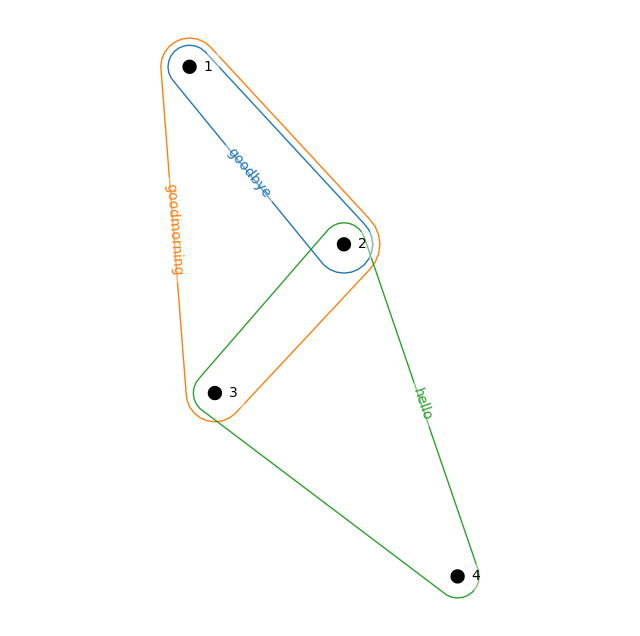

In [41]:
hnx.draw(anothergraph)

<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


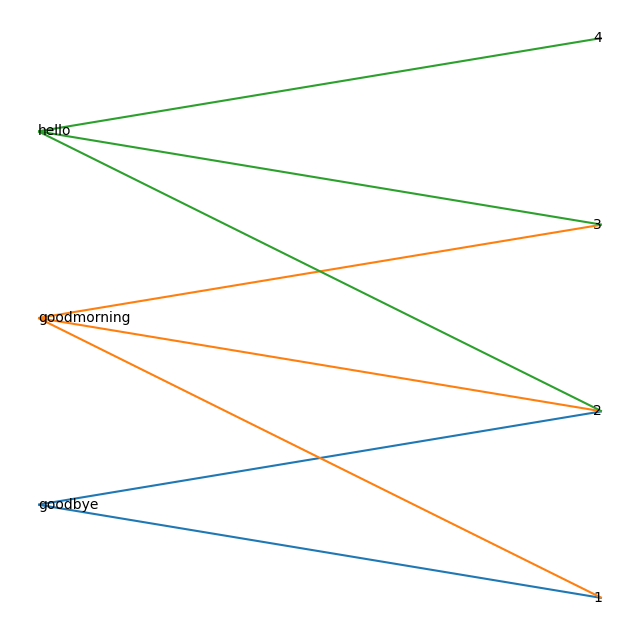

In [30]:
hnx.drawing.two_column.draw(anothergraph)

In [1]:
from pynauty import *

In [27]:
g = Graph(5)
g.connect_vertex(0, [1, 2, 3])
g.connect_vertex(2, [1, 3, 4])
g.connect_vertex(4, [3])
g.set_vertex_coloring([{0,1,4},{2,3}])
print(g)

Graph(number_of_vertices=5, directed=False,
 adjacency_dict = {
  0: [1, 2, 3],
  2: [1, 3, 4],
  4: [3],
 },
 vertex_coloring = [
  set([0, 1, 4]),
  set([2, 3]),
 ],
)


In [28]:
canon_label(g)

[4, 0, 1, 3, 2]

In [30]:
newadj = {canon_label(g).index(key): [canon_label(g).index(v) for v in value] for key, value in g.adjacency_dict.items()}
new_color = [{canon_label(g).index(i) for i in {0,1,4}}, {canon_label(g).index(i) for i in {2,3}}]

In [31]:
gnew = Graph(number_of_vertices=5, directed=False,
 adjacency_dict = newnew,
 vertex_coloring = new_color,
)

In [32]:
canon_label(gnew)

[0, 1, 2, 3, 4]

In [69]:
g3 = Graph(number_of_vertices=5, directed=False,
 adjacency_dict = {
  0: [1, 2, 3],
  2: [1, 3, 4],
  4: [3 ,2],
 },
 vertex_coloring = [
  set([0, 1, 4]),
  set([2, 3]),
 ],
)

g4 = Graph(number_of_vertices=5, directed=False,
 adjacency_dict = {
  0: [1, 2, 3],
  2: [1, 3, 4],
  4: [3],
 },
 vertex_coloring = [
  set([0, 1, 4]),
  set([2, 3]),
 ],
)

In [70]:
isomorphic(g3,g4)

True

In [42]:
autgrp(g)

([], 1.0, 0, [0, 1, 2, 3, 4], 5)

In [4]:
g2 = Graph(5)
g2.connect_vertex(1, [2, 3, 4])
g2.connect_vertex(3, [2, 4, 0])
g2.connect_vertex(0, [4])
g2.set_vertex_coloring([{0,1,2},{3,4}])
print(g2)

Graph(number_of_vertices=5, directed=False,
 adjacency_dict = {
  1: [2, 3, 4],
  3: [0, 2, 4],
  0: [4],
 },
 vertex_coloring = [
  set([0, 1, 2]),
  set([3, 4]),
 ],
)


In [40]:
autgrp(g2)

([], 1.0, 0, [0, 1, 2, 3, 4], 5)

In [43]:
isomorphic(g,g2)

True

In [44]:
canon_label(g)

[4, 0, 1, 3, 2]

In [45]:
canon_label(g2)

[0, 1, 2, 4, 3]

In [46]:
certificate(g2) == certificate(g)

True

In [47]:
certificate(g2)

b'\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x008\x00\x00\x00\x00\x00\x00\x00H\x00\x00\x00\x00\x00\x00\x00\xc8\x00\x00\x00\x00\x00\x00\x00\xf0'

In [37]:
delete_random_edge(g)

(2, 3)

In [38]:
certificate(g2) == certificate(g)

False